In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [6]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
predictor=iris.data[:,0:4]
target=iris.target
predictor=StandardScaler().fit_transform(predictor)

In [8]:
pca=PCA(n_components=2)
princmp=pca.fit_transform(predictor)
princmp_ds=pd.DataFrame(data=princmp,
                       columns=['pc 1','pc 2'])
princmp_ds

,pc 1,pc 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [13]:
target_ds=pd.DataFrame(data=target.reshape(-1,1),columns=['class'])
data_mod=pd.concat([princmp_ds.reset_index(drop=True),target_ds]
                   ,axis=1)
print(data_mod)


         pc 1      pc 2  class
0   -2.264703  0.480027      0
1   -2.080961 -0.674134      0
2   -2.364229 -0.341908      0
3   -2.299384 -0.597395      0
4   -2.389842  0.646835      0
..        ...       ...    ...
145  1.870503  0.386966      2
146  1.564580 -0.896687      2
147  1.521170  0.269069      2
148  1.372788  1.011254      2
149  0.960656 -0.024332      2

[150 rows x 3 columns]


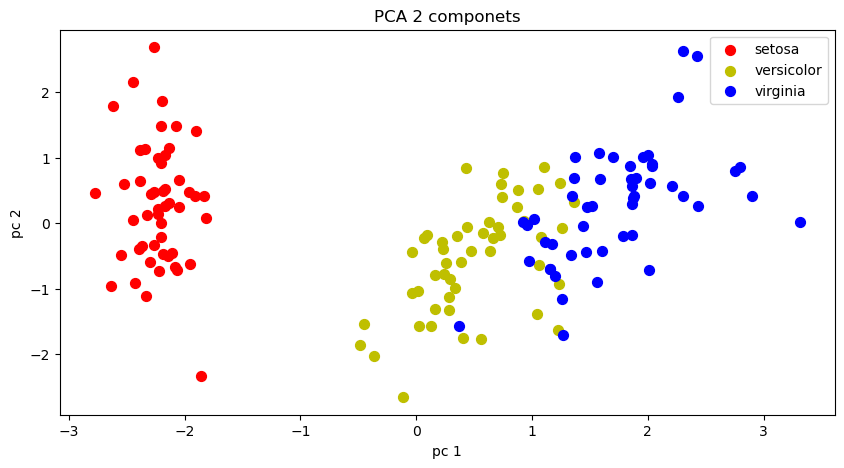

In [41]:
fig=plt.figure(figsize=(10,5))
pca_plot=fig.add_subplot(1,1,1)
pca_plot.set_xlabel("pc 1")
pca_plot.set_ylabel("pc 2")
pca_plot.set_title("PCA 2 componets")

color=['r','y','b']
classes=[0,1,2]
labels=['setosa','versicolor','virginia']
for class_value, color, labels in zip(classes,color,labels):
    indices=data_mod['class']==class_value
    pca_plot.scatter(data_mod.loc[indices,'pc 1'],
                    data_mod.loc[indices,'pc 2'],
                    c=color,
                    s=50,
                    label=labels)
pca_plot.legend()
plt.show()

In [43]:
from scipy.linalg import svd
iris=datasets.load_iris()
predictors=iris.data[:,0:4]
u,s,vt=svd(predictors)
u

array([[-0.06161685,  0.12961144,  0.0021386 , ..., -0.09343429,
        -0.09573864, -0.08085465],
       [-0.05807094,  0.11101978,  0.07067239, ...,  0.03690405,
        -0.03153954,  0.01309526],
       [-0.05676305,  0.11796647,  0.00434255, ...,  0.03066199,
         0.19531473,  0.13569909],
       ...,
       [-0.0940593 , -0.0498297 , -0.04144001, ...,  0.98181631,
        -0.02194514, -0.00894446],
       [-0.09488961, -0.05610123, -0.21297821, ..., -0.02155617,
         0.94178018, -0.02971961],
       [-0.08847836, -0.0515697 , -0.09575285, ..., -0.0086052 ,
        -0.03021088,  0.9736599 ]])

In [44]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.utils import column_or_1d
data = pd.read_csv("btissue.csv")
#print(data.tail(35))
X = data.iloc[:,0:9]
y = column_or_1d(data['class'], warn=True) # To generate 1d array, column_or_1d has been used 
clf = LinearDiscriminantAnalysis() 
lda_fit = clf.fit(X, y)
print(lda_fit)
LinearDiscriminantAnalysis(n_components=None, priors=None,
                           shrinkage=None, solver='svd', 
                           store_covariance=False, tol=0.0001)

pred = clf.predict([[1588.000000, 0.085908, -0.086323,
516.943603, 12895.342130, 25.933331, 141.722204, 416.175649,
1452.331924]])

print(pred)

LinearDiscriminantAnalysis()
['con']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy  as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data=pd.read_csv('apndcts.csv') #Segregating the predictor variables
predictor = data.iloc[:, 0:7]  #Segregating the target/class variab
target=data.iloc[:, 7]

test = SelectKBest(chi2, k=2)
test = test.fit(predictor, target)
features = test.transform(predictor)

print(predictor.columns)
np.set_printoptions(precision=3)
print(test.scores_)

Index(['At1', ' At2', ' At3', ' At4', ' At5', ' At6', ' At7'], dtype='object')
[1.771 1.627 2.391 1.084 1.673 1.647 2.236]


In [6]:
import pandas as pd
import numpy  as np
l = [10,20,30,12,45,58,89]
b = [78,25,45,52,87,96,36]
p = [3000,5000,8000,70000,4000,2100,8500]
df = pd.DataFrame({"length" : l,
                  "breadth" : b,
                  "price" : p})
df["area"] = df["length"] * df["breadth"]
print(df)


   length  breadth  price  area
0      10       78   3000   780
1      20       25   5000   500
2      30       45   8000  1350
3      12       52  70000   624
4      45       87   4000  3915
5      58       96   2100  5568
6      89       36   8500  3204


In [7]:
df = pd.DataFrame({
    "gender": ["male","female","male","female","male"],
    "city": ["delhi","mumbai","delhi","chennai","kolkata"],
    "qualification": ["bachelor","master","phd","bachelor","master"]
})

df_encoded = pd.get_dummies(df, columns=["gender","city","qualification"])
print(df_encoded)

   gender_female  gender_male  city_chennai  city_delhi  city_kolkata  \
0              0            1             0           1             0   
1              1            0             0           0             0   
2              0            1             0           1             0   
3              1            0             1           0             0   
4              0            1             0           0             1   

   city_mumbai  qualification_bachelor  qualification_master  \
0            0                       1                     0   
1            1                       0                     1   
2            0                       0                     0   
3            0                       1                     0   
4            0                       0                     1   

   qualification_phd  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  


In [8]:
df = pd.DataFrame({
    "satisfaction": ["excellent","good","average","poor","good","excellent"]
})

order= {
    "poor": 1,
    "average": 2,
    "good": 3,
    "excellent": 4
}

df["satisfy numeric"] = df["satisfaction"].map(order)
print(df)

  satisfaction  satisfy numeric
0    excellent                4
1         good                3
2      average                2
3         poor                1
4         good                3
5    excellent                4
